In [6]:
import json

with open('results.json') as f:
    results = json.load(f)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [9]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. blue: 0.7930
	2. <pad>: 0.4507
	3. round: 0.2614
	4. is: 0.1616
	5. has: 0.0513
	6. four: 0.0513
	7. angle: 0.0513
	8. three: 0.0513
	9. red: 0.0513
	10. green: 0.0513
	11. up: 0.0354
	12. left: 0.0351
	13. rotate: 0.0349
	14. blank: 0.0347
	15. shape: 0.0342
	16. position: 0.0342
	17. canvas: 0.0342
	18. this: 0.0342
	19. color: 0.0342
	20. white: 0.0337
	21. unrotate: 0.0335
	22. right: 0.0333
	23. bottom: 0.0331
	24. <unk>: nan

Top-n images with largest absolute values of logits:


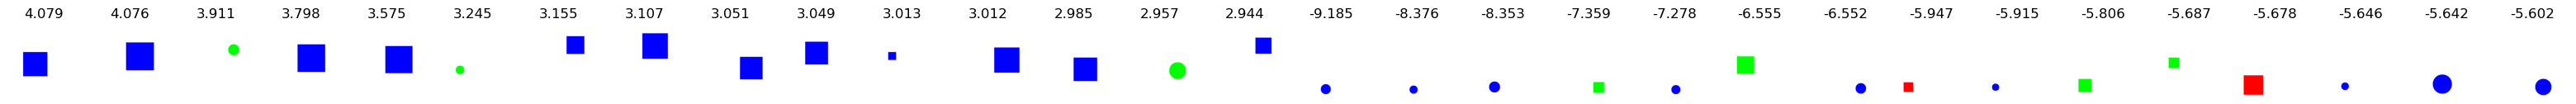

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. <pad>: 0.4203
	2. is: 0.2953
	3. round: 0.2844
	4. has: 0.0769
	5. four: 0.0769
	6. angle: 0.0769
	7. three: 0.0769
	8. left: 0.0525
	9. white: 0.0521
	10. up: 0.0517
	11. rotate: 0.0517
	12. blue: 0.0513
	13. green: 0.0513
	14. canvas: 0.0513
	15. shape: 0.0513
	16. color: 0.0513
	17. red: 0.0513
	18. this: 0.0513
	19. position: 0.0513
	20. bottom: 0.0509
	21. unrotate: 0.0509
	22. blank: 0.0503
	23. right: 0.0500
	24. <unk>: nan

Top-n images with largest absolute values of logits:


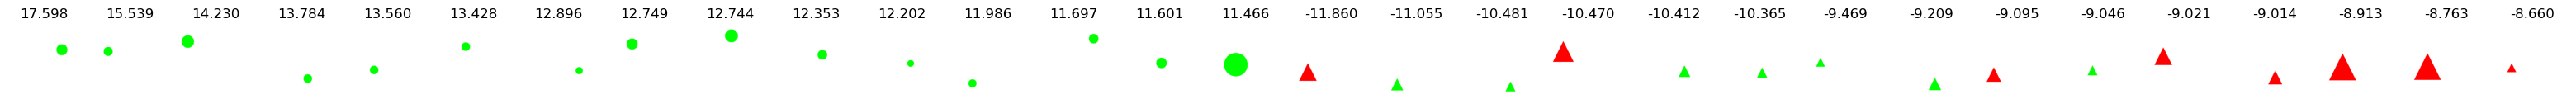

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. angle: 0.4362
	2. blue: 0.2421
	3. three: 0.2210
	4. shape: 0.1635
	5. green: 0.1459
	6. round: 0.1411
	7. <pad>: 0.1009
	8. bottom: 0.0893
	9. right: 0.0855
	10. left: 0.0675
	11. white: 0.0668
	12. is: 0.0656
	13. four: 0.0555
	14. this: 0.0354
	15. blank: 0.0338
	16. unrotate: 0.0200
	17. up: 0.0036
	18. has: 0.0000
	19. red: 0.0000
	20. rotate: 0.0000
	21. color: 0.0000
	22. canvas: 0.0000
	23. position: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


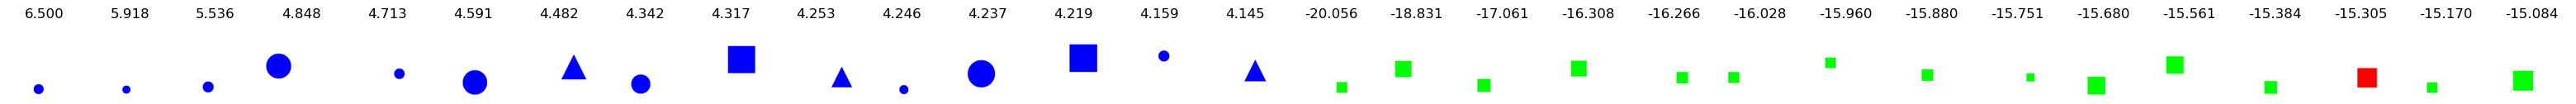

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. white: 0.1934
	2. blank: 0.1925
	3. rotate: 0.1527
	4. left: 0.1503
	5. canvas: 0.1455
	6. color: 0.1195
	7. has: 0.1024
	8. three: 0.0974
	9. bottom: 0.0829
	10. position: 0.0676
	11. unrotate: 0.0636
	12. shape: 0.0588
	13. round: 0.0545
	14. blue: 0.0431
	15. is: 0.0313
	16. up: 0.0248
	17. <pad>: 0.0203
	18. green: 0.0184
	19. this: 0.0146
	20. four: 0.0109
	21. red: 0.0000
	22. right: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


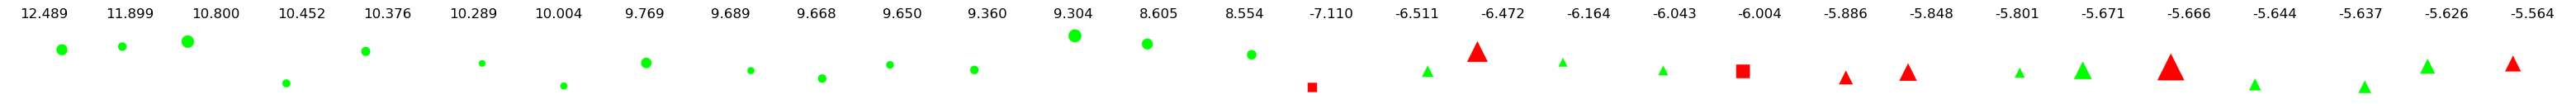

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. this: 0.2871
	2. right: 0.1672
	3. color: 0.1363
	4. position: 0.1216
	5. shape: 0.1201
	6. up: 0.0933
	7. bottom: 0.0921
	8. four: 0.0919
	9. red: 0.0775
	10. has: 0.0767
	11. <pad>: 0.0431
	12. green: 0.0295
	13. rotate: 0.0269
	14. blank: 0.0116
	15. round: 0.0089
	16. is: 0.0082
	17. blue: 0.0030
	18. left: 0.0027
	19. canvas: 0.0024
	20. angle: 0.0015
	21. three: 0.0000
	22. unrotate: 0.0000
	23. white: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


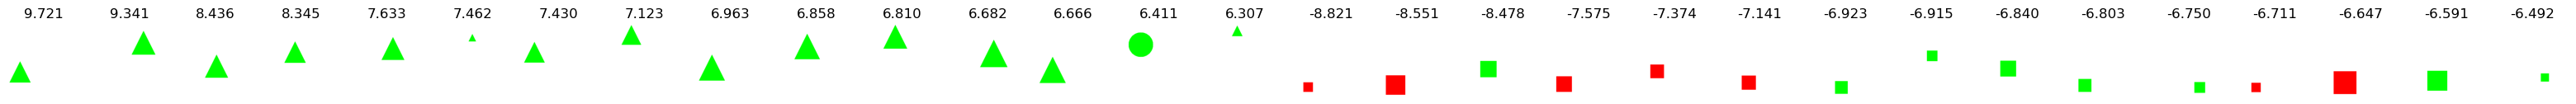

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. four: 0.6940
	2. green: 0.6283
	3. red: 0.5719
	4. round: 0.5093
	5. <pad>: 0.2632
	6. three: 0.0256
	7. blue: 0.0256
	8. angle: 0.0128
	9. has: 0.0128
	10. white: 0.0094
	11. bottom: 0.0093
	12. left: 0.0092
	13. rotate: 0.0088
	14. shape: 0.0085
	15. canvas: 0.0085
	16. color: 0.0085
	17. this: 0.0085
	18. position: 0.0085
	19. unrotate: 0.0083
	20. right: 0.0078
	21. up: 0.0077
	22. blank: 0.0076
	23. is: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


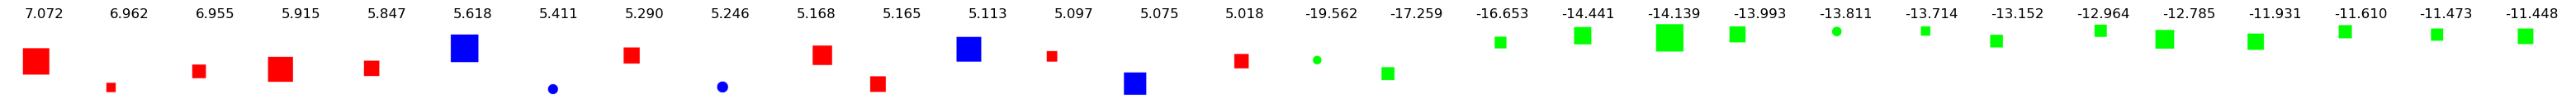

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. blue: 0.2114
	2. red: 0.2005
	3. canvas: 0.1888
	4. this: 0.1648
	5. has: 0.1637
	6. shape: 0.1064
	7. four: 0.1007
	8. three: 0.0959
	9. <pad>: 0.0931
	10. color: 0.0803
	11. rotate: 0.0687
	12. up: 0.0514
	13. bottom: 0.0359
	14. angle: 0.0236
	15. is: 0.0153
	16. position: 0.0129
	17. blank: 0.0090
	18. round: 0.0038
	19. left: 0.0009
	20. green: 0.0000
	21. unrotate: 0.0000
	22. right: 0.0000
	23. white: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


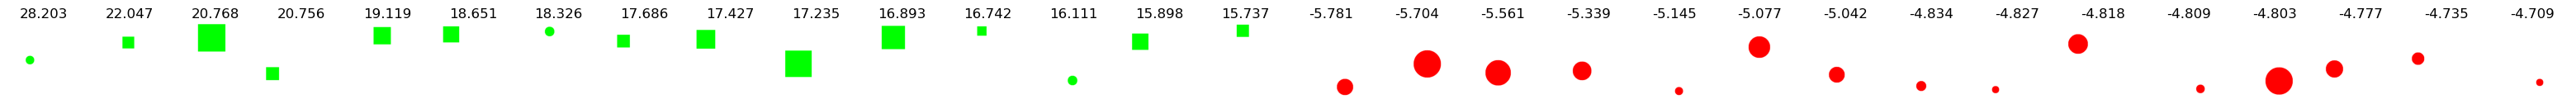

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. four: 0.6797
	2. is: 0.3703
	3. color: 0.3280
	4. <pad>: 0.3269
	5. blue: 0.2646
	6. green: 0.1118
	7. position: 0.0526
	8. has: 0.0472
	9. round: 0.0093
	10. rotate: 0.0008
	11. left: 0.0001
	12. three: 0.0000
	13. angle: 0.0000
	14. red: 0.0000
	15. white: 0.0000
	16. up: 0.0000
	17. canvas: 0.0000
	18. shape: 0.0000
	19. this: 0.0000
	20. unrotate: 0.0000
	21. bottom: 0.0000
	22. blank: 0.0000
	23. right: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


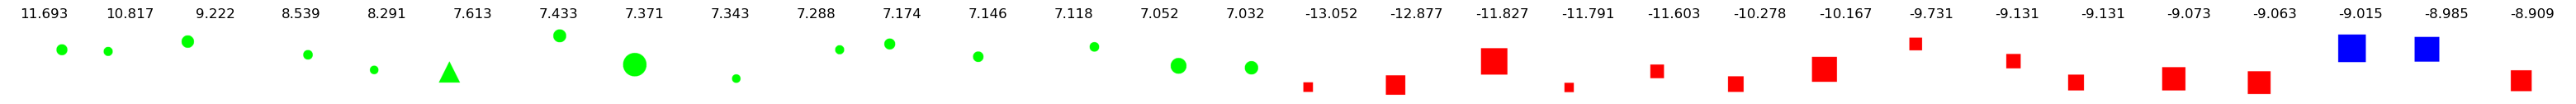

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. red: 0.2593
	2. green: 0.2279
	3. angle: 0.2092
	4. is: 0.1730
	5. bottom: 0.1718
	6. right: 0.1617
	7. position: 0.1411
	8. four: 0.1364
	9. up: 0.1274
	10. has: 0.0831
	11. left: 0.0731
	12. round: 0.0645
	13. <pad>: 0.0639
	14. shape: 0.0503
	15. rotate: 0.0363
	16. blank: 0.0162
	17. this: 0.0093
	18. unrotate: 0.0074
	19. blue: 0.0013
	20. three: 0.0000
	21. white: 0.0000
	22. canvas: 0.0000
	23. color: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


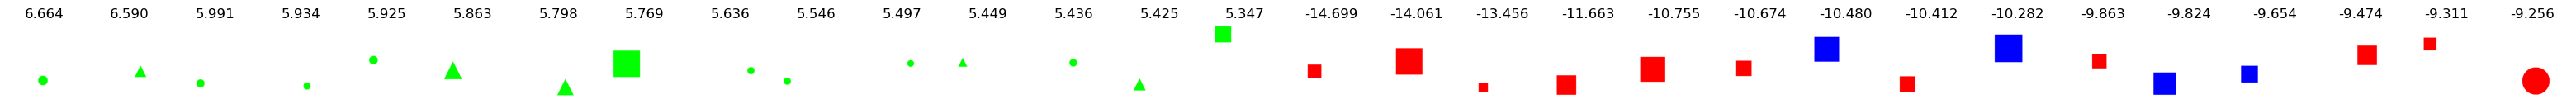

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. is: 0.3655
	2. green: 0.2786
	3. round: 0.2445
	4. canvas: 0.2399
	5. shape: 0.1853
	6. this: 0.1433
	7. three: 0.1155
	8. <pad>: 0.1030
	9. left: 0.0648
	10. white: 0.0542
	11. up: 0.0004
	12. rotate: 0.0000
	13. four: 0.0000
	14. angle: 0.0000
	15. has: 0.0000
	16. red: 0.0000
	17. blue: 0.0000
	18. right: 0.0000
	19. blank: 0.0000
	20. color: 0.0000
	21. position: 0.0000
	22. unrotate: 0.0000
	23. bottom: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


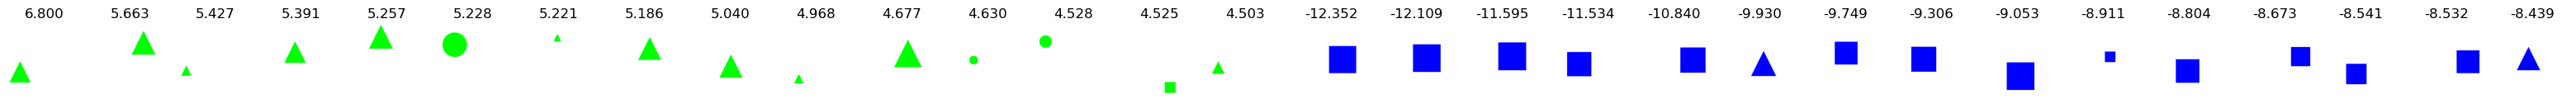

----------------------------------------------------------------------------------------------------


In [10]:
for i in range(10):
    visualize_concept(i)